In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

from glob import glob

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.datasets import load_files #load my file
from sklearn.model_selection import train_test_split #divide train and test sets
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D #modle construct funfrom keras
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential


from keras.utils import np_utils

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
print(os.listdir("F:\\STUDY\\Graduation-Project\\Work\\Flower-Classification-1\\Input\\flowers"))#print file in flowers
print(os.listdir("./Input/flowers"))
# ../代表当前文件夹
# Any results you write to the current directory are saved as output.

Using TensorFlow backend.
['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


## python文件路径的表示方法  
* 绝对路径：F:\\STUDY  
* 相对路径：
    1. ./Input 表示当前目录下的Input文件夹
    2. ../Input 表示上一层目录下的Input文件夹，与当前文件夹并列

**划分数据集**
> date: train valid test

In [6]:
# Make a parent directory `data` and three sub directories `train`, `valid` and 'test'
# Linux 环境-创建文件夹
%rm -rf data # Remove if already present

%mkdir -p data/train/daisy
%mkdir -p data/train/tulip
%mkdir -p data/train/sunflower
%mkdir -p data/train/rose
%mkdir -p data/train/dandelion

%mkdir -p data/valid/daisy
%mkdir -p data/valid/tulip
%mkdir -p data/valid/sunflower
%mkdir -p data/valid/rose
%mkdir -p data/valid/dandelion

%mkdir -p data/test/daisy
%mkdir -p data/test/tulip
%mkdir -p data/test/sunflower
%mkdir -p data/test/rose
%mkdir -p data/test/dandelion


%ls data/train
%ls data/valid
%ls data/test

UsageError: Line magic function `%rm` not found.


In [32]:
# Windows-创建文件夹
def mkdir(path):
    #判断路径是否存在
    isExists=os.path.exists(path)
    if not isExists:
        os.makedirs(path)
        print(path + '创建成功')
        return True
    else:
        print(path + '文件已存在')
        return False
categories_dir = os.listdir("./Input/flowers")
dir_name = ['train', 'valid', 'test']
#创建data文件夹
if not os.path.exists('./data'):
    os.makedirs('./data')
else:
    print('data已存在')
#创建文件夹目录地址path[]
path = []
for name in dir_name:
    for category in categories_dir:
         path.append('./data/' + name + '/' + category)
for add in path:
    mkdir(add)

data已存在
./data/train/daisy创建成功
./data/train/dandelion创建成功
./data/train/rose创建成功
./data/train/sunflower创建成功
./data/train/tulip创建成功
./data/valid/daisy创建成功
./data/valid/dandelion创建成功
./data/valid/rose创建成功
./data/valid/sunflower创建成功
./data/valid/tulip创建成功
./data/test/daisy创建成功
./data/test/dandelion创建成功
./data/test/rose创建成功
./data/test/sunflower创建成功
./data/test/tulip创建成功


In [3]:
base_dir = "./Input/flowers"
categories = os.listdir(base_dir)
print(categories)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


这里有个陷阱：base_dir = "../input/flowers-recognition/flowers/flowers"<br>
有两个flowers文件，但是右边没有

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt #绘图库
import matplotlib.image as mpimg
import random
from shutil import copyfile

plt.rcParams["figure.figsize"] = (20,3) #RC参数，用来自定义图形的各种默认属性，dict，注意是我们自己显示的图片大小

In [5]:
def train_valid_test(files): #file --> list
    """This function splits the files in training, validation and testing sets with 60%, 20%
    and 20% of data in each respectively"""
    train_files = files[:int(len(files)*0.6)] #前60%
    valid_files = files[int(len(files)*0.6):int(len(files)*0.8)] #60%-80%
    test_files = files[int(len(files)*0.8):] #80%-100%
    return train_files, valid_files, test_files

In [6]:
def copy_files(files, src, dest):
    """This function copy files from src to dest"""
    for file in files:
        copyfile("{}/{}".format(src, file), "{}/{}".format(dest, file))

In [7]:
def plot_images(category, images): #显示某一类的五张图片，image：list 存放地址
    """This method plots five images from a category"""
    for i in range(len(images)):
        plt.subplot(1,5,i+1)
        plt.title(category)
        image = mpimg.imread("{}/{}/{}".format(base_dir, category, images[i]))
        plt.imshow(image)
    plt.show()

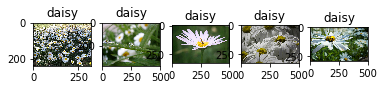

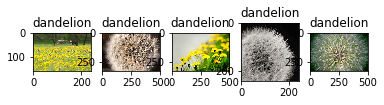

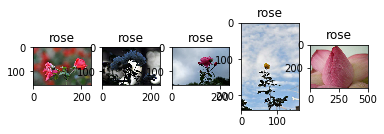

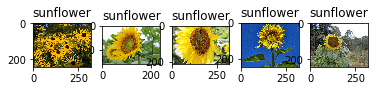

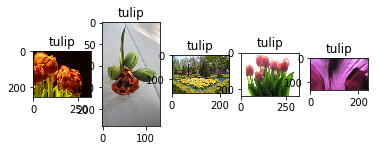

In [9]:
total_images = []
for category in categories: #对某一类
    images = os.listdir("{}/{}".format(base_dir, category)) #返回某一类的图片地址 list
    random.shuffle(images) #打乱顺序
    filtered_images = [image for image in images if image not in ['flickr.py', 'flickr.pyc', 'run_me.py']] #过滤出某一类所有纯图片
    
    total_images.append(len(filtered_images)) #list,每一类图片的数量
    
    #从原始文件夹flowers拷贝到data，并且根据比例划分
    train_images, valid_images, test_images = train_valid_test(filtered_images) 
    #拷贝图片
    copy_files(train_images, "{}/{}".format(base_dir, category), "./data/train/{}".format(category))
    copy_files(valid_images, "{}/{}".format(base_dir, category), "./data/valid/{}".format(category))
    copy_files(test_images, "{}/{}".format(base_dir, category), "./data/test/{}".format(category))
    plot_images(category, images[:5]) #显示前五张，每次都是随机的

**可以看到图片大小是不同的**

In [10]:
print(total_images)#五类图片数量


[769, 1052, 784, 734, 984]


In [11]:
print("Total images: {}".format(np.sum(total_images)))
for i in range(len(categories)):
    print("{}: {}".format(categories[i], total_images[i]))

Total images: 4323
daisy: 769
dandelion: 1052
rose: 784
sunflower: 734
tulip: 984


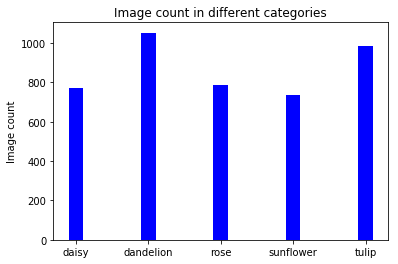

In [12]:
#绘制条形图
y_pos = np.arange(len(categories))
plt.bar(y_pos, height=total_images, width=0.2,color='b',align='center')
#x轴的label
plt.xticks(y_pos, categories)
#y轴的label
plt.ylabel("Image count")
plt.title("Image count in different categories")
#显示
plt.show()

### data = load_files(path)
path路径子目录中的文件
返回：Dictionary-like object

* data：原始数据
* filenames：每个文件的地址
* target：类别label(从0开始索引)
* target_names：类别名字

比如：load_dataset('data/train')  
data是一个dict,包含了train目录中有的五类图片  
data\['target'] = \[0 0 4 ... 2 3 3]  0-4表示的是种类  
data\['target_name'] = \['daisy', 'dandelion', 'rose', 'sunflower', 'tulip'] 表示0-4代表的是哪个种类
data\['filenames'] 代表读取每个图片文件

所以我们才需要在train、test、valid中分别创建5个种类文件夹，因为我们需要这种形式  
才能用load_files(path)函数读取图片和标签

In [17]:
# define function to load train, valid and test datasets
def load_dataset(path):
    data = load_files(path)
    flower_files = np.array(data['filenames'])
    print(data['target_names'])
    flower_targets = np_utils.to_categorical(np.array(data['target']), num_classes = 5) #将类别label用one-hot编码
    return flower_files, flower_targets #返回文件名和标签

# load train, test, and validation datasets
# 分别获取图片文件和标签
train_files, train_targets = load_dataset('data/train')
valid_files, valid_targets = load_dataset('data/valid')
test_files, test_targets = load_dataset('data/test')

print('There are %d total flower categories.' % len(categories))
print('There are %s total flower images.\n' % len(np.hstack([train_files, valid_files, test_files]))) #水平堆叠数组
print('There are %d training flower images.' % len(train_files))
print('There are %d validation flower images.' % len(valid_files))
print('There are %d test flower images.' % len(test_files))

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
There are 5 total flower categories.
There are 6740 total flower images.

There are 3631 training flower images.
There are 1569 validation flower images.
There are 1540 test flower images.


In [19]:
from keras.preprocessing import image                  
from tqdm import tqdm

**tqdm(iterable)**
添加一个进度表

In [20]:
#将一张图片转换成4维的tensor
def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224)) #加载图片，统一大小
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0) #在axis=0的位置添加一个新的维度

In [21]:
#applies path_to_tensor to all images and returns a list of tensors.
#返回一个tensors的list
def paths_to_tensor(img_paths):
    #对每一个图片转为tensor，返回list
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)#将list_of_tensors改为垂直堆叠

In [22]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras

train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255
print(train_tensors.shape)

100%|██████████| 1540/1540 [00:26<00:00, 57.07it/s]
(3631, 224, 224, 3)


## CNN

In [ ]:
%mkdir -p saved_models

In [23]:
os.makedirs('./saved_models')

In [41]:
# Keras 序列模式
# just a demo
model = Sequential()
"""
### Define architecture.
model.add(Conv2D(filters=16, kernel_size=2, strides=1, activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Conv2D(filters=32, kernel_size=2, strides=1, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Conv2D(filters=64, kernel_size=2, strides=1, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(GlobalAveragePooling2D())
model.add(Dense(5, activation='softmax'))
"""

### My architecture
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(224,224,3)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(GlobalAveragePooling2D())
model.add(Dense(5, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 222, 222, 32)      9248      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 111, 111, 64)      18496     
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
global_average_pooling2d_2 ( (None, 64)                0         
__________

In [42]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

keras.callbacks.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)<br><br>
Save the model after every epoch.




In [43]:
from keras.callbacks import ModelCheckpoint  

### number of epochs
epochs = 50

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 3631 samples, validate on 1569 samples
Epoch 1/50
3631/3631 [==============================] - 87s 24ms/step - loss: 1.3807 - acc: 0.3861 - val_loss: 1.2235 - val_acc: 0.4748

Epoch 00001: val_loss improved from inf to 1.22353, saving model to saved_models/weights.best.from_scratch.hdf5
Epoch 2/50
3631/3631 [==============================] - 52s 14ms/step - loss: 1.2453 - acc: 0.4632 - val_loss: 1.1751 - val_acc: 0.5233

Epoch 00002: val_loss improved from 1.22353 to 1.17507, saving model to saved_models/weights.best.from_scratch.hdf5
Epoch 3/50
3631/3631 [==============================] - 52s 14ms/step - loss: 1.1897 - acc: 0.4949 - val_loss: 1.1549 - val_acc: 0.5277

Epoch 00003: val_loss improved from 1.17507 to 1.15492, saving model to saved_models/weights.best.from_scratch.hdf5
Epoch 4/50
3631/3631 [==============================] - 52s 14ms/step - loss: 1.1574 - acc: 0.5288 - val_loss: 1.0658 - val_acc: 0.5953

Epoch 00004: val_loss improved from 1.15492 to 1.06579, savi

In [44]:
model.load_weights('saved_models/weights.best.from_scratch.hdf5')

np.expand_dims(tensor, axis=0)
<br>为什么这里还要扩展维数，不是很懂
<br>可能是与np.argmax(test_targets, axis=1)相匹配？

In [45]:
# get index of predicted flower category for each image in test set
flower_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(flower_predictions)==np.argmax(test_targets, axis=1))/len(flower_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 76.8182%


## CNN using Transfer Learning

In [ ]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.models import Model

inception_resnet = InceptionResNetV2(weights="imagenet",include_top=False, input_shape=(224,224,3))
# 冻结前五层，不训练
for layer in inception_resnet.layers[:5]:
    layer.trainable = False
# 添加全连接层
output_model = inception_resnet.output
output_model = Flatten()(output_model)
output_model = Dense(200, activation='relu')(output_model)
output_model = Dropout(0.5)(output_model)
output_model = Dense(200, activation='relu')(output_model)
output_model = Dense(5, activation='softmax')(output_model)

model = Model(inputs=inception_resnet.input, outputs=output_model)
model.summary()

以下为常规操作

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint  

### number of epochs
epochs = 50

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.inception_resnetv2.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

In [ ]:
### load best weights
model.load_weights('saved_models/weights.best.inception_resnetv2.hdf5')

In [ ]:
# get index of predicted flower category for each image in test set 
flower_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(flower_predictions)==np.argmax(test_targets, axis=1))/len(flower_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

In [ ]:
# 打印测试集前五个
for i in range(5):
    predicted = np.argmax(model.predict(np.expand_dims(test_tensors[i], axis=0))) # 预测值
    actual = np.argmax(test_targets[i]) # 实际值
    print("Predicted: {}, Actual: {}, Name: {}".format(predicted, actual, test_files[i].split("/")[2]))
    # 显示图片
    image = mpimg.imread(test_files[i])
    plt.imshow(image)
    plt.show()

In [ ]:
# 删除自己生成的data数据，即划分数据集的那个文件夹
%rm -rf data